# Regularización en Regresión Polinómica (Ridge vs Lasso)

Este notebook demuestra cómo **Ridge (L2)** y **Lasso (L1)** ayudan a **controlar el overfitting** cuando usamos un polinomio de grado alto (grado 10).


## 1. Idea principal

- Con polinomios de **grado alto** el modelo puede **sobreajustar** (overfitting).
- **Ridge (L2)** penaliza la **suma de los cuadrados de los coeficientes** → reduce su magnitud.
- **Lasso (L1)** penaliza la **suma de los valores absolutos de los coeficientes** → puede dejar coeficientes exactamente en **0** (selección de variables).
- Ambos usan un hiperparámetro **`alpha`** que controla la fuerza de la penalización.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Datos sintéticos (relación cúbica con ruido)
rng = np.random.default_rng(7)
n = 160
X = np.linspace(-3, 3, n).reshape(-1, 1)

def f(x):
    return 0.7 * x**3 - 2.5 * x**2 + 1.5 * x + 3

y_true = f(X).ravel()
noise = rng.normal(0, 3.0, size=n)
y = y_true + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# 2) Transformación polinómica de grado 10
deg = 10
poly = PolynomialFeatures(degree=deg, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
X_plot = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)


/mnt/c/Users/jorge/OneDrive/Escritorio/irenedeveloper/Semana3IA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+02, tolerance: 1.831e+00
  model = cd_fast.enet_coordinate_descent(


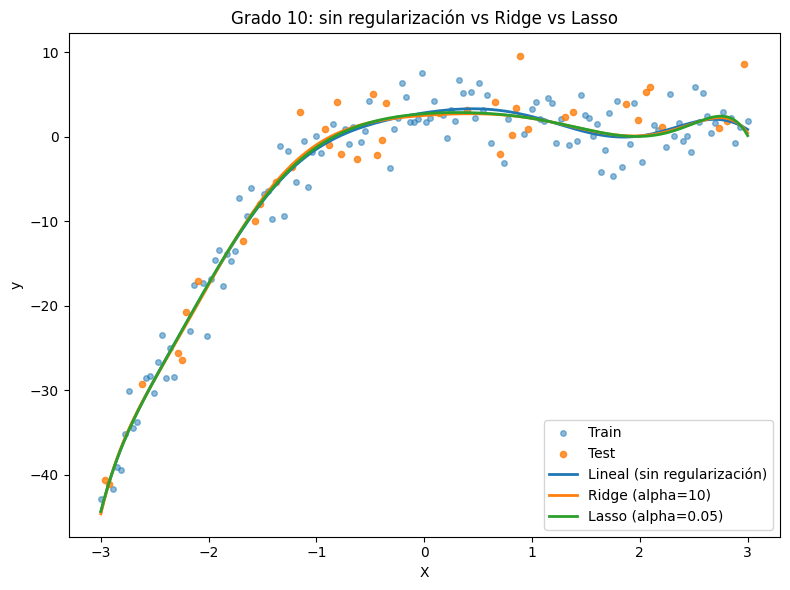

,modelo,MSE_train,MSE_test,R2_train,R2_test
0,Lineal (sin regularización),5.904,9.261,0.961,0.941
1,Ridge (alpha=10),5.991,9.162,0.961,0.942
2,Lasso (alpha=0.05),5.961,9.392,0.961,0.940


In [2]:
# 3) Modelos: sin regularización, Ridge y Lasso
models = {
    "Lineal (sin regularización)": LinearRegression(),
    "Ridge (alpha=10)": Ridge(alpha=10.0, random_state=0),
    "Lasso (alpha=0.05)": Lasso(alpha=0.05, max_iter=10000, random_state=0),
}

results = []

plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, s=16, alpha=0.5, label="Train")
plt.scatter(X_test, y_test, s=20, alpha=0.8, label="Test")

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    y_plot = model.predict(X_plot_poly)

    results.append({
        "modelo": name,
        "MSE_train": mean_squared_error(y_train, y_pred_train),
        "MSE_test": mean_squared_error(y_test, y_pred_test),
        "R2_train": r2_score(y_train, y_pred_train),
        "R2_test": r2_score(y_test, y_pred_test),
    })

    plt.plot(X_plot.ravel(), y_plot, linewidth=2, label=name)

plt.title("Grado 10: sin regularización vs Ridge vs Lasso")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

import pandas as pd
pd.DataFrame(results).round(3)


## 4. Guardar artefactos (opcional)

En esta parte guardamos la **figura** y los **datasets** generados para poder versionarlos en GitHub.


/mnt/c/Users/jorge/OneDrive/Escritorio/irenedeveloper/Semana3IA/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.010e+02, tolerance: 1.831e+00
  model = cd_fast.enet_coordinate_descent(


Guardado: grado10_ridge_lasso.png, datos_grado10.csv, metricas_grado10.csv


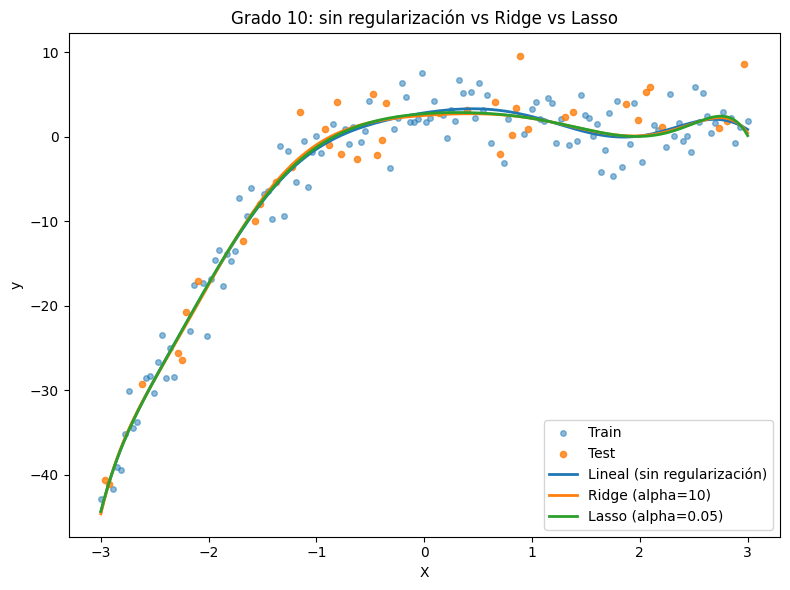

In [4]:
# Guardar artefactos en disco
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, s=16, alpha=0.5, label="Train")
plt.scatter(X_test, y_test, s=20, alpha=0.8, label="Test")

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_plot = model.predict(X_plot_poly)
    plt.plot(X_plot.ravel(), y_plot, linewidth=2, label=name)

plt.title("Grado 10: sin regularización vs Ridge vs Lasso")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.savefig("grado10_ridge_lasso.png", dpi=160)

# Guardar datasets
data_csv = pd.DataFrame({"X": X.ravel(), "y": y, "y_true": y_true})
data_csv.to_csv("datos_grado10.csv", index=False)

metrics_df = pd.DataFrame(results)
metrics_df.to_csv("metricas_grado10.csv", index=False)

print("Guardado: grado10_ridge_lasso.png, datos_grado10.csv, metricas_grado10.csv")
